In [2]:
import pandas as pd
df = pd.read_csv('EcLearnix.csv')
df.head()

,User_ID,User_Type,Department,Region,Platform_Source,App_Installed,First_Login_Completed,Days_Since_Last_Activity,Registered_for_Event,Event_Type,Event_Mode,Newsletter_Subscribed,Saved_Event_Count,Feedback_Rating,Course_Completed,Time_Spent_Total_Minutes
0,ECL100000,Faculty,Polytechnic,South,Email,0,1,18,0,STTP,Offline,0,2,5,1,330
1,ECL100001,Faculty,Law,West,LinkedIn,1,0,85,0,Hackathon,Online,0,6,1,0,490
2,ECL100002,Faculty,Medical,North,ACE Website,1,0,6,1,FDP,Hybrid,0,2,3,1,491
3,ECL100003,Professional,Arts,South,Email,0,1,41,0,Conference,Online,1,0,2,0,495
4,ECL100004,Faculty,Science,East,Email,1,0,5,0,Webinar,Online,0,0,4,0,71


In [3]:
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   User_ID                   10000 non-null  object
 1   User_Type                 10000 non-null  object
 2   Department                10000 non-null  object
 3   Region                    10000 non-null  object
 4   Platform_Source           10000 non-null  object
 5   App_Installed             10000 non-null  int64 
 6   First_Login_Completed     10000 non-null  int64 
 7   Days_Since_Last_Activity  10000 non-null  int64 
 8   Registered_for_Event      10000 non-null  int64 
 9   Event_Type                10000 non-null  object
 10  Event_Mode                10000 non-null  object
 11  Newsletter_Subscribed     10000 non-null  int64 
 12  Saved_Event_Count         10000 non-null  int64 
 13  Feedback_Rating           10000 non-null  int64 
 14  Course_Completed       

,0
User_ID,0
User_Type,0
Department,0
Region,0
Platform_Source,0
App_Installed,0
First_Login_Completed,0
Days_Since_Last_Activity,0
Registered_for_Event,0
Event_Type,0


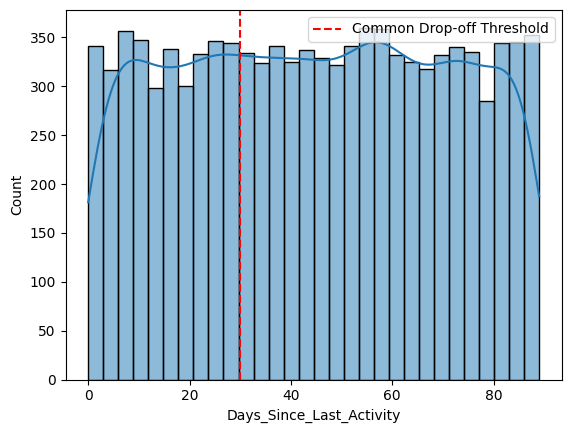

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Days_Since_Last_Activity'], bins=30, kde=True)
plt.axvline(30, color='red', linestyle='--', label='Common Drop-off Threshold')
plt.legend()



* The distribution is fairly uniform, meaning inactivity is spread out across different durations — there's no sharp drop at any specific point
* Common Drop-off Threshold is drawn around 30 days, indicating users who have not interacted for 30+ days are considered dropped off.
* The KDE curve smoothed-line shows the trend of inactivity density
* The dips around 0-10 days and slight peaks around 20-30 and 50-60 suggest, users either drop either early or slowly become inactive over time





<Axes: xlabel='User_Type', ylabel='Days_Since_Last_Activity'>

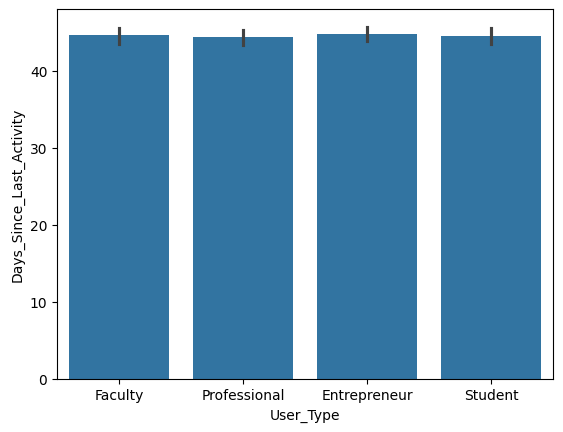

In [6]:
sns.barplot(x='User_Type', y='Days_Since_Last_Activity', data=df)

In [7]:
drop_summary = df.groupby('User_Type')['Days_Since_Last_Activity'].mean().sort_values(ascending=False)
print(drop_summary)
most_inactive_type = drop_summary.idxmax()
highest_avg_inactivity = drop_summary.max()
print(f"The user type with the highest inactivity is: {most_inactive_type} with an average of {highest_avg_inactivity:.2f} days.")

User_Type
Entrepreneur    44.802120
Faculty         44.600328
Student         44.580008
Professional    44.345161
Name: Days_Since_Last_Activity, dtype: float64
The user type with the highest inactivity is: Entrepreneur with an average of 44.80 days.


The user type with the highest inactivity is: Entrepreneur with an average of 44.80 days.

<Axes: xlabel='Region'>

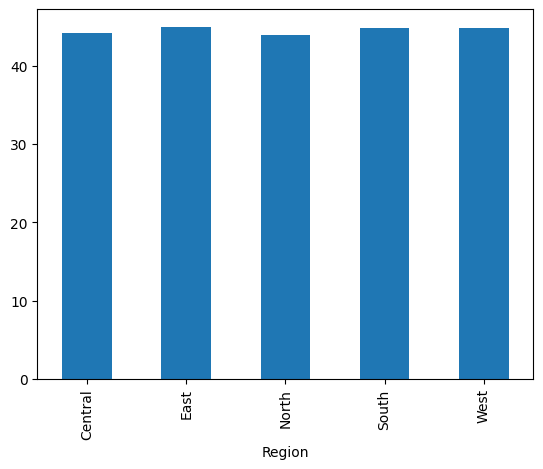

In [8]:
df.groupby('Region')['Days_Since_Last_Activity'].mean().plot(kind='bar')

In [10]:
drop_summary = df.groupby('Region')['Days_Since_Last_Activity'].mean().sort_values(ascending=False)
print(drop_summary)
most_inactive_region = drop_summary.idxmax()
highest_avg_inactivity = drop_summary.max()
print(f"The region with the highest inactivity is: {most_inactive_region} with an average of {highest_avg_inactivity:.2f} days.")

Region
East       44.983918
South      44.888085
West       44.819182
Central    44.275127
North      43.933901
Name: Days_Since_Last_Activity, dtype: float64
The region with the highest inactivity is: East with an average of 44.98 days.


The region with the highest inactivity is: East with an average of 44.98 days.

In [11]:
drop_summary = df.groupby('Department')['Days_Since_Last_Activity'].mean().sort_values(ascending=False)
print(drop_summary)
most_inactive_dept = drop_summary.idxmax()
highest_avg_inactivity = drop_summary.max()
print(f"The department with the highest inactivity is: {most_inactive_dept} with an average of {highest_avg_inactivity:.2f} days.")

Department
Medical        45.871245
Commerce       44.931736
Science        44.517598
Law            44.316667
Polytechnic    44.306338
Engineering    44.306281
Arts           43.888812
Name: Days_Since_Last_Activity, dtype: float64
The department with the highest inactivity is: Medical with an average of 45.87 days.


The department with the highest inactivity is: Medical with an average of 45.87 days.

In [12]:
drop_summary = df.groupby('Platform_Source')['Days_Since_Last_Activity'].mean().sort_values(ascending=False)
print(drop_summary)
most_inactive_platform_src = drop_summary.idxmax()
highest_avg_inactivity = drop_summary.max()
print(f"The platform source with the highest inactivity is: {most_inactive_platform_src} with an average of {highest_avg_inactivity:.2f} days.")

Platform_Source
LinkedIn       45.536163
Email          45.075676
YouTube        44.426437
ACE Website    44.187002
WhatsApp       44.175449
Instagram      44.081431
Name: Days_Since_Last_Activity, dtype: float64
The platform source with the highest inactivity is: LinkedIn with an average of 45.54 days.


The platform source with the highest inactivity is: LinkedIn with an average of 45.54 days.


In [14]:
df['Is_Dropped'] = df['Days_Since_Last_Activity'] >= 30
features = [
    'User_Type', 'Department', 'Region',
    'Platform_Source', 'App_Installed',
    'First_Login_Completed', 'Newsletter_Subscribed',
    'Course_Completed', 'Registered_for_Event'
]

In [16]:
grouped = df.groupby(features).agg(
    total_users=('User_ID', 'count'),
    dropped_users=('Is_Dropped', 'sum')
).reset_index()

grouped['drop_rate'] = grouped['dropped_users'] / grouped['total_users']

grouped_sorted = grouped.sort_values(['drop_rate', 'total_users'], ascending=[False, False])
grouped_sorted.head(10)


,User_Type,Department,Region,Platform_Source,App_Installed,First_Login_Completed,Newsletter_Subscribed,Course_Completed,Registered_for_Event,total_users,dropped_users,drop_rate
1254,Entrepreneur,Medical,North,WhatsApp,1,1,0,0,0,5,5,1.0
148,Entrepreneur,Arts,North,WhatsApp,1,1,0,1,0,4,4,1.0
2731,Faculty,Engineering,West,WhatsApp,1,1,0,0,0,4,4,1.0
3088,Faculty,Medical,East,Email,1,1,0,0,1,4,4,1.0
4150,Professional,Commerce,East,LinkedIn,1,0,0,0,1,4,4,1.0
4223,Professional,Commerce,North,YouTube,1,0,0,0,0,4,4,1.0
4673,Professional,Law,East,Instagram,1,1,0,0,1,4,4,1.0
4956,Professional,Medical,East,Instagram,0,1,0,0,0,4,4,1.0
6099,Student,Commerce,East,Instagram,0,1,0,0,0,4,4,1.0
6398,Student,Engineering,East,WhatsApp,1,1,0,0,0,4,4,1.0


In [18]:
dropped_df = df[df['Is_Dropped'] == 1]

top_combos = dropped_df.groupby(features).size().reset_index(name='count')
top_combos.sort_values(by='count', ascending=False).head(10)

,User_Type,Department,Region,Platform_Source,App_Installed,First_Login_Completed,Newsletter_Subscribed,Course_Completed,Registered_for_Event,count
910,Entrepreneur,Medical,North,WhatsApp,1,1,0,0,0,5
2293,Faculty,Medical,South,ACE Website,1,1,0,0,0,5
928,Entrepreneur,Medical,South,Email,1,0,0,1,1,4
2222,Faculty,Medical,East,Email,1,1,0,0,1,4
96,Entrepreneur,Arts,North,WhatsApp,1,1,0,1,0,4
4412,Student,Commerce,East,Instagram,0,1,0,0,0,4
5453,Student,Science,North,LinkedIn,1,1,0,0,1,4
2233,Faculty,Medical,East,LinkedIn,1,1,0,0,1,4
3376,Professional,Law,East,Instagram,1,1,0,0,1,4
5248,Student,Polytechnic,North,LinkedIn,1,1,0,0,1,4


* Medical + Faculty/Entrepreneur segments are underperforming, Medical content or event offerings aren't meeting expectations. Redesign medical content pathways, improve relevance, offer targeted events or micro-courses
* Instagram and WhatsApp Sources Show Low Conversions, Improve post-acquisition nudges (email, in-app messages), or reconsider these as "shallow sources"
* Newsletter Subscription is 0 in All Cases, Newsletter may not be reaching users or needs repositioning — use automated popups, rewards for subscribing

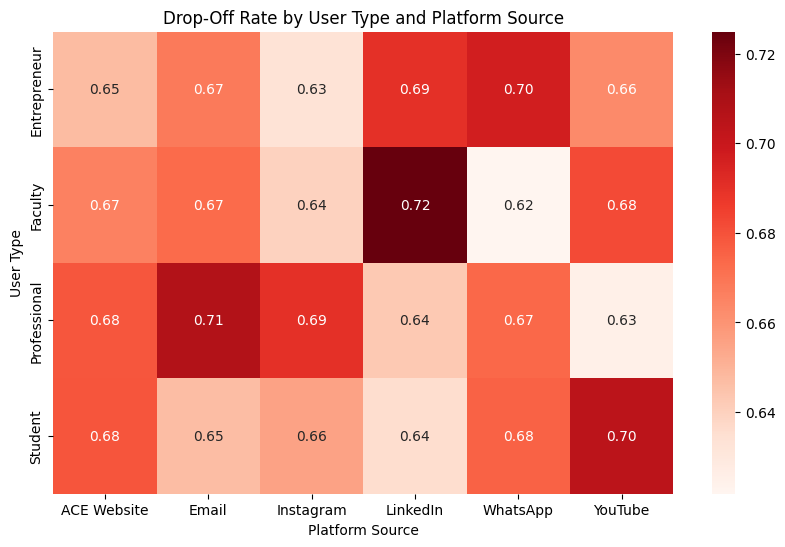

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create drop-off flag
df['Is_Dropped'] = df['Days_Since_Last_Activity'] >= 30

# Pivot table for heatmap
heat_df = df.pivot_table(
    index='User_Type',
    columns='Platform_Source',
    values='Is_Dropped',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heat_df, annot=True, cmap='Reds', fmt=".2f")
plt.title("Drop-Off Rate by User Type and Platform Source")
plt.ylabel("User Type")
plt.xlabel("Platform Source")
plt.show()


* Highest drop-off — suggests LinkedIn isn’t effective for retaining faculty users. Content mismatch or low follow-up.
* Email campaigns are failing to retain professionals — possibly due to unengaging onboarding or irrelevant content.
* YouTube brings students in, but they often don’t stick around — maybe no push to install app or register events.
* Entrepreneur × WhatsApp: High drop-off despite being reachable — possibly low engagement post-install.

In [19]:
import pandas as pd
import plotly.express as px

# Filter dropped users
df['Is_Dropped'] = df['Days_Since_Last_Activity'] >= 30
dropped = df[df['Is_Dropped'] == 1]

# Group by relevant dimensions
sunburst_df = dropped.groupby(
    ['User_Type', 'Department', 'Region', 'Platform_Source']
).size().reset_index(name='Drop_Count')

# Plot sunburst
fig = px.sunburst(
    sunburst_df,
    path=['User_Type', 'Department', 'Region', 'Platform_Source'],
    values='Drop_Count',
    title='Drop-Off Patterns by User Traits',
    color='Drop_Count',
    color_continuous_scale='Reds'
)
fig.show()
